# Entropy

## Entropy is a measure of the uncertainty associated with a given distribution.

Let's explain Entropy clearly by example. Suppose we have a box with color balls in it. If we know that all of the balls are green, what color would be the ball we pull out of the box? it would be green obviously so the Entropy in this example is 0 and it means our data is pure and we don't have any uncertainty.
what if we have added some red balls to the box? because we have mixed of color balls we are not certain about the color of the ball that would pull out but we know that the number of green balls is more than the number of red balls so the probability of green is more than red. 
what if we have added red balls till we have half red balls and half green balls? in this case, we are completely uncertain about the color of the ball because the number of the red and green ones are equal and our data is completely impure so Entropy is equal to the maximum in this case.

In [1]:
from IPython.display import HTML
html1 = '<img src="purity.jpg" width="800" height="600" align="center"/>'
HTML(html1)

## Dive into mathematics

For every other case in between, we can compute the entropy of a distribution, like q(y), using the formula below, where C is the number of classes:

In [2]:
html1 = '<img src="Entropy.png" width="400" height="200" style="margin-left:auto; margin-right:auto"/>'
HTML(html1)

Let's compute Entropy for 2 examples above:
1. All balls are green:
    We have only one class and its probability is 1 so the Entropy is 0.
2. Half green, half red:
    We have two classes with 0.5 probability which gives us Entropy equal to log(2).

# Cross Entropy

If we know the true distribution of a random variable, we can compute its Entropy. But, if that’s the case, why we train our data to predict unseen data?
Actually we know the distribution of our data but we want to create a model that predict that distribution well enough.
Let’s assume our data follow this other distribution p(y). But we know they are actually coming from the true (unknown) distribution q(y), right?
If we compute entropy like this, we are actually computing the cross-entropy between both distributions:

In [3]:
html1 = '<img src="cross_entropy.jpg" width="600" height="200" align="center"/>'
HTML(html1)

If we can match p(y) to q(y) perfectly, the computed values for both cross-entropy and entropy will match as well.
Since this is likely never happening, cross-entropy will have a BIGGER value than the entropy computed on the true distribution. We can compute the difference of Entropy and Cross Entropy by the formula below:

In [4]:
html1 = '<img src="KL Divergence.jpg" width="800" height="200" align="center"/>'
HTML(html1)

In this case we want to define a model have a closest ditribution(p(y)) to the real distribution(q(y)) and if we are going to close these two distribution, the difference of Entropy and Cross Entropy is going down to 0 too. this is exactly same as what we are doing with loss function.
### It looks for the best possible p(y), which is the one that minimizes the Cross Entropy.

## Load dependencies

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
import keras
from keras.layers import Dense
from keras import Sequential
from tensorflow.keras.optimizers import Adam

## Import Dataset 

In [6]:
df = pd.read_csv('E:\Educate\Datasets\Covid19 Syptoms\Covid Dataset.csv')

In [7]:
df

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


## Convert categorical data to numeric data

In [8]:
mapping = dict(Yes = 1, No = 0)
new_df = df
for column in new_df.columns:
    new_df[column] = new_df[column].map(mapping)
new_df

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


## Check for missing informations

In [9]:
counter = 0
for i in new_df:
    for j in new_df[i]:
        if new_df[i][j] not in [0,1]:
            counter += 1
counter

0

## Number of positive and negative tests

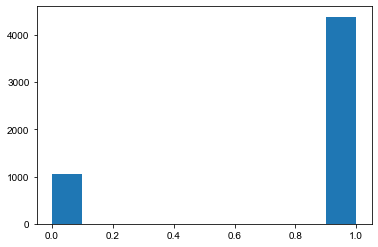

In [10]:
plt.hist(new_df["COVID-19"])
sns.set()

## Split data to test and train

In [11]:
train , test = train_test_split(new_df , test_size=0.2)

In [12]:
fearure_columns = ['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market']

In [13]:
x_train , y_train , x_test, y_test = train.loc[: , fearure_columns] , train.loc[: , 'COVID-19'] ,test.loc[: , fearure_columns] , test.loc[: , 'COVID-19']

## Develope Neural Network Model

In [17]:
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(20,)))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-2), metrics=['accuracy'])

## Loss Function: Binary Cross Entropy
During training, the classifier uses each of the N points in its training set to compute the cross-entropy loss, effectively fitting the distribution p(y)! Since the probability of each point is 1/N, cross-entropy is given by:

In [20]:
html1 = '<img src="LFBCE.jpg" width="600" height="150" align="center"/>'
HTML(html1)

For this example, we have two classes Positive COVID-19 infection or Negative and we are going to predict the probability of infection with given symptoms so if someone infect by the virus, the class value is equal to 1 and if not, the class value would be equal to 0. There are only two cases and the sum of probability of infection and not infected must be equal to 1 and p(y) is the probability of infection:

In [21]:
html1 = '<img src="classes.jpg" width="400" height="100" align="center"/>'
HTML(html1)

The final step is to compute the average of all points in both classes, Positive and Negative:

In [22]:
html1 = '<img src="average sum.jpg" width="600" height="150" align="center"/>'
HTML(html1)

Finally, with a little bit of manipulation, we can take any point, either from the Positive or Negative classes, under the same formula:

In [23]:
html1 = '<img src="BCE.jpg" width="600" height="150" align="center"/>'
HTML(html1)

In [24]:
model.fit(x_train, y_train, batch_size = 256, epochs = 150, verbose=1, validation_data=(x_test, y_test))

Epoch 1/150
17/17 [==============================] - 4s 46ms/step - loss: 0.4655 - accuracy: 0.8098 - val_loss: 0.4503 - val_accuracy: 0.7939
Epoch 2/150
17/17 [==============================] - 0s 3ms/step - loss: 0.3938 - accuracy: 0.8104 - val_loss: 0.3708 - val_accuracy: 0.8123
Epoch 3/150
17/17 [==============================] - 0s 3ms/step - loss: 0.3207 - accuracy: 0.8364 - val_loss: 0.2996 - val_accuracy: 0.8454
Epoch 4/150
17/17 [==============================] - 0s 3ms/step - loss: 0.2541 - accuracy: 0.8896 - val_loss: 0.2448 - val_accuracy: 0.9062
Epoch 5/150
17/17 [==============================] - 0s 3ms/step - loss: 0.2064 - accuracy: 0.9250 - val_loss: 0.2078 - val_accuracy: 0.9246
Epoch 6/150
17/17 [==============================] - 0s 3ms/step - loss: 0.1748 - accuracy: 0.9381 - val_loss: 0.1880 - val_accuracy: 0.9264
Epoch 7/150
17/17 [==============================] - 0s 3ms/step - loss: 0.1541 - accuracy: 0.9489 - val_loss: 0.1698 - val_accuracy: 0.9384
Epoch 8/150


In [25]:
model.evaluate(x_test, y_test)

34/34 [==============================] - 0s 1ms/step - loss: 0.0449 - accuracy: 0.9807


[0.04491296783089638, 0.9806807637214661]

# Categorical Cross Entropy
When we have multi class classification, we can't use binary cross entropy because binary cross entropy iclude only 2 classes. We use categorical cross entropy formulti class classification and there is no
 difference in the formula.

In [26]:
html1 = '<img src="CCE2.jpg" width="600" height="150" align="center"/>'
HTML(html1)

Like binary cross entropy, P is the predicted probability distribution and t is true probability distribution in categorical term.

## Load Dependencies

In [27]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import MaxPooling2D , Conv2D, Flatten


## Import Dataset

In [28]:
(x_train_2, y_train_2), (x_valid_2, y_valid_2) = mnist.load_data()

## Anylyzing

In [29]:
x_train_2.shape, y_train_2.shape

((60000, 28, 28), (60000,))

In [30]:
y_train_2[0]

5

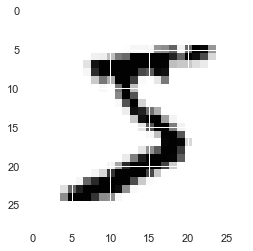

In [31]:
plt.imshow(x_train_2[0],cmap='Greys')

## Preprocess Data

In [32]:
x_train_2_c = x_train_2.reshape(60000, 784).astype('float32')
x_valid_2_c = x_valid_2.reshape(10000, 784).astype('float32')

In [33]:
x_train_2_c /= 255
x_valid_2_c /= 255

In [34]:
x_valid_2_c[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [35]:
n_classes = 10
y_train_2_c = to_categorical(y_train_2, n_classes)
y_valid_2_c = to_categorical(y_valid_2, n_classes)

In [36]:
y_valid_2_c[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## Deisgn Neural Network

In [37]:
model_2 = Sequential()
model_2.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model_2.add(Dense(10, activation='softmax'))

In [38]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


## Configuration & Train

In [39]:
model_2.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])

C:\Users\mmagb\anaconda3\envs\tf-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [40]:
model_2.fit(x_train_2_c, y_train_2_c, batch_size=128, epochs=150, verbose=1, validation_data=(x_valid_2_c, y_valid_2_c))

Epoch 1/150
469/469 [==============================] - 4s 2ms/step - loss: 2.0800 - accuracy: 0.4772 - val_loss: 1.8487 - val_accuracy: 0.6636
Epoch 2/150
469/469 [==============================] - 1s 2ms/step - loss: 1.6621 - accuracy: 0.7090 - val_loss: 1.4679 - val_accuracy: 0.7465
Epoch 3/150
469/469 [==============================] - 1s 2ms/step - loss: 1.3310 - accuracy: 0.7668 - val_loss: 1.1813 - val_accuracy: 0.7887
Epoch 4/150
469/469 [==============================] - 1s 2ms/step - loss: 1.0915 - accuracy: 0.7991 - val_loss: 0.9816 - val_accuracy: 0.8142
Epoch 5/150
469/469 [==============================] - 1s 2ms/step - loss: 0.9261 - accuracy: 0.8215 - val_loss: 0.8445 - val_accuracy: 0.8312
Epoch 6/150
469/469 [==============================] - 1s 2ms/step - loss: 0.8110 - accuracy: 0.8357 - val_loss: 0.7475 - val_accuracy: 0.8477
Epoch 7/150
469/469 [==============================] - 1s 2ms/step - loss: 0.7281 - accuracy: 0.8458 - val_loss: 0.6767 - val_accuracy: 0.8556

In [41]:
model_2.evaluate(x_valid_2_c,y_valid_2_c)

313/313 [==============================] - 1s 2ms/step - loss: 0.2039 - accuracy: 0.9403


[0.20392625033855438, 0.9402999877929688]

#  Sparse Categorical Cross Entropy

The sparse categorical cross entropy is much like categorical cross entorpy with a slight difference, in categorical cross entropy the true distribution is multiplied to logarithm of the predicted distribution, and because the true distribution vector is all zero except one index it returns only one logarithmic term that has the same index in the true distribution but in the sparse categorical cross entropy there is no true disturbution and the only term is logarithm of maximum value of prediction.

Let's clear it by example:

Consider a classification problem with 5 categories (or classes). In the case of categorical cross entropy, the one-hot target may be [0, 1, 0, 0, 0] (which means second class) and the model may predict [.2, .5, .1, .1, .1] (probably right), then we multiply the first vector to logarithm of second vector and because all of indexes of the first vector is zero except the second one, we can multilpy the second index of each vector only so we have 1 * log(.5)
In the case of sparse categorical cross entropy, the target index is the maximum value of the second vector and that is [.5] with 2nd index, so our equation give us the log(0.5) with index of 1 (because the 2nd value of first vector is 1) as a solution.

Consider now a classification problem with 3 classes. In the case of categorical cross entropy, the one-hot target might be [0, 0, 1] and the model may predict [.5, .1, .4] (probably inaccurate, given that it gives more probability to the first class) so we multiply the third value of each vector only and it give us 1 * log(0.4)
But in the case of sparse categorical cross entropy, the target index is the maximum value of the second vector and that is [.5] with 3rd index, so our equation give us the log(0.5) with index of 0 (because the 3rd value of first vector is 0) as a solution.

### Many categorical models produce sparse categorical cross entropy output because you save space, but lose A LOT of information.

There are a number of situations to use sparse categorical cross entropy, including:
1. when your classes are mutually exclusive, i.e. you don’t care at all about other close-enough predictions
2. the number of categories is large to the prediction output becomes overwhelming.

## Deisgn Neural Network

In [42]:
model_3 = Sequential()
model_3.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model_3.add(Dense(10, activation='softmax'))

In [43]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


## Configuration & Train

In [44]:
model_3.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(lr=0.001), metrics=['sparse_categorical_accuracy'])

In [45]:
y_train_2[0:14]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6], dtype=uint8)

In [46]:
model_3.fit(x_train_2_c, y_train_2, batch_size=128, epochs=150, verbose=1, validation_data=(x_valid_2_c, y_valid_2))

Epoch 1/150
469/469 [==============================] - 3s 2ms/step - loss: 2.4044 - sparse_categorical_accuracy: 0.0972 - val_loss: 2.3089 - val_sparse_categorical_accuracy: 0.1124
Epoch 2/150
469/469 [==============================] - 1s 2ms/step - loss: 2.2671 - sparse_categorical_accuracy: 0.1787 - val_loss: 2.2270 - val_sparse_categorical_accuracy: 0.2983
Epoch 3/150
469/469 [==============================] - 1s 2ms/step - loss: 2.2021 - sparse_categorical_accuracy: 0.3576 - val_loss: 2.1709 - val_sparse_categorical_accuracy: 0.4211
Epoch 4/150
469/469 [==============================] - 1s 2ms/step - loss: 2.1502 - sparse_categorical_accuracy: 0.4493 - val_loss: 2.1205 - val_sparse_categorical_accuracy: 0.5182
Epoch 5/150
469/469 [==============================] - 1s 3ms/step - loss: 2.1015 - sparse_categorical_accuracy: 0.5304 - val_loss: 2.0721 - val_sparse_categorical_accuracy: 0.5785
Epoch 6/150
469/469 [==============================] - 2s 3ms/step - loss: 2.0543 - sparse_cate

In [47]:
model_3.evaluate(x_valid_2_c,y_valid_2)

313/313 [==============================] - 1s 2ms/step - loss: 0.4387 - sparse_categorical_accuracy: 0.8938


[0.438679039478302, 0.8938000202178955]